In [2]:
# Ask what is the probability that the cosmic-ray background would have given you a measurement as 
# signal-like or more than the signal that you received.

In [3]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

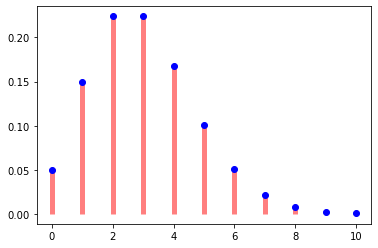

In [4]:
avg_cosmic_background = 3; offset = 0

x = np.linspace(0,10,11)
plt.plot(x, stats.poisson.pmf(x, avg_cosmic_background, offset), 'bo', lw=0)
plt.vlines(x,0, stats.poisson.pmf(x, avg_cosmic_background, offset), colors = 'r', lw=5, alpha=.5 )

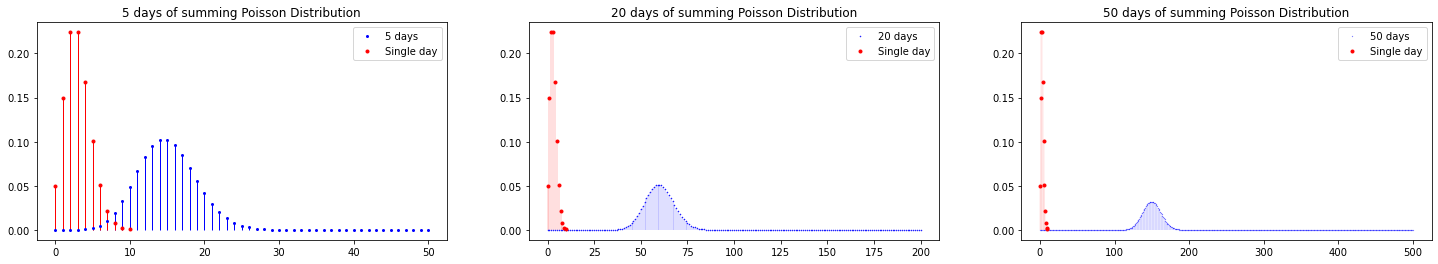

In [18]:
fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize = (25,4))
err_data = stats.poisson.pmf(x, avg_cosmic_background, offset)
x = np.linspace(0, 10, 11)

days = 5
days_1 = 20
days_2 = 50

y1 = np.convolve(err_data, err_data)
for i in range(2, days):
    y1 = np.convolve(y1, err_data)
    
ax.set_title('5 days of summing Poisson Distribution')
x_new = np.linspace(0, 10*days, 10*days+1)
ax.plot(x_new, y1, 'bo', lw=0, ms=10/days, label = f'{days} days')
ax.plot(x, err_data, 'ro', lw=0, ms=3, label = 'Single day')
ax.vlines(x_new, 0, y1, colors='b', lw=5/days, alpha=1)
ax.vlines(x, 0, err_data, colors='r', lw=5/days, alpha=1)
ax.legend()

y2 = np.convolve(err_data, err_data)
for i in range(2, days_1):
    y2 = np.convolve(y2, err_data)
    
ax1.set_title('20 days of summing Poisson Distribution')
x_new = np.linspace(0, 10*days_1, 10*days_1+1)
ax1.plot(x_new, y2, 'bo', lw=0, ms=10/days_1, label = f'{days_1} days')
ax1.plot(x, err_data, 'ro', lw=0, ms=3, label = 'Single day')
ax1.vlines(x_new, 0, y2, colors='b', lw=5/days_1, alpha=1)
ax1.vlines(x, 0, err_data, colors='r', lw=5/days_1, alpha=1)
ax1.legend()

y3 = np.convolve(err_data, err_data)
for i in range(2, days_2):
    y3 = np.convolve(y3, err_data)
    
ax2.set_title('50 days of summing Poisson Distribution')
x_new = np.linspace(0, 10*days_2, 10*days_2+1)
ax2.plot(x_new, y3, 'bo', lw=0, ms=10/days_2, label = f'{days_2} days')
ax2.plot(x, err_data, 'ro', lw=0, ms=3, label = 'Single day')
ax2.vlines(x_new, 0, y3, colors='b', lw=5/days_2, alpha=1)
ax2.vlines(x, 0, err_data, colors='r', lw=5/days_2, alpha=1)
ax2.legend()



After 5 days of averaging the poisson distribution, the resulting distribution will still be gaussian because I am now ... This makes sense from a conceptual point of view because I am ... From a mathematical point of view ... 

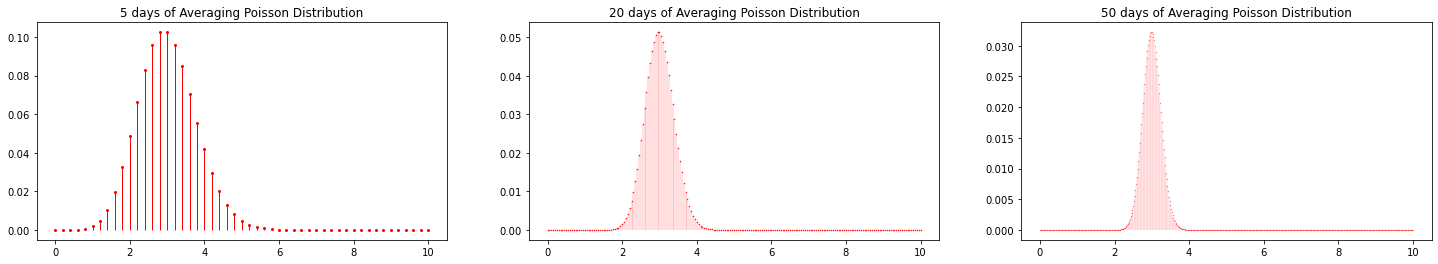

In [26]:
fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize = (25,4))
err_data = stats.poisson.pmf(x, avg_cosmic_background, offset)
x = np.linspace(0, 10, 11)

days = 5
days_1 = 20
days_2 = 50

y1 = np.convolve(err_data, err_data)
for i in range(2, days):
    y1 = np.convolve(y1, err_data)
    
ax.set_title('5 days of Averaging Poisson Distribution')
x_new = np.linspace(0, 10*days, 10*days+1)/days
ax.plot(x_new, y1, 'ro', lw=0, ms=10/days, label = f'{days} days')
ax.vlines(x_new, 0, y1, colors='r', lw=5/days, alpha=1)


y2 = np.convolve(err_data, err_data)
for i in range(2, days_1):
    y2 = np.convolve(y2, err_data)
    
ax1.set_title('20 days of Averaging Poisson Distribution')
x_new = np.linspace(0, 10*days_1, 10*days_1+1)/days_1
ax1.plot(x_new, y2, 'ro', lw=0, ms=10/days_1, label = f'{days_1} days')
ax1.vlines(x_new, 0, y2, colors='r', lw=5/days_1, alpha=1)


y3 = np.convolve(err_data, err_data)
for i in range(2, days_2):
    y3 = np.convolve(y3, err_data)
    
ax2.set_title('50 days of Averaging Poisson Distribution')
x_new = np.linspace(0, 10*days_2, 10*days_2+1)/days_2
ax2.plot(x_new, y3, 'ro', lw=0, ms=10/days_2, label = f'{days_2} days')
ax2.vlines(x_new, 0, y3, colors='r', lw=5/days_2, alpha=1)


I am going to find the deviation given a chosen value of background noise collected over 37 days. Each day I will see, on average, 5 gamma rays. I should roughly see 74 gamma rays over the span on the 37 days. I will take this value and apply it to the cdf function and then I will find the deviation using the ppf function after converting to a gaussian distribution 

Percentage of true data that appear as false signals: 5.309774842032766e-11
Sigma value associated with percentage: 6.458


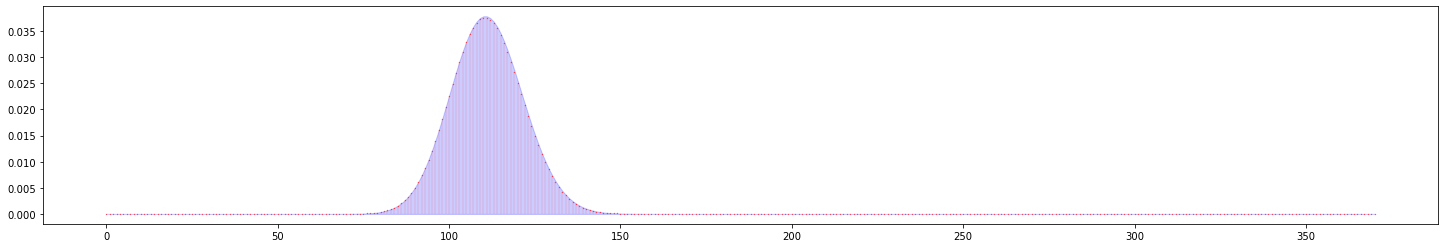

In [62]:
fig, (ax) = plt.subplots(1, 1, figsize = (25,4))
err_data = stats.poisson.pmf(x, avg_cosmic_background, offset)
x = np.linspace(0, 10, 11)

days = 37

y1 = np.convolve(err_data, err_data)
for i in range(2, days):
    y1 = np.convolve(y1, err_data)
    
x_new = np.linspace(0, 10*days, 10*days+1)
ax.plot(x_new, y1, 'ro', lw=0, ms=10/days, label = f'{days} days')
ax.vlines(x_new, 0, y1, colors='r', lw=5/days, alpha=1)
ax.fill_between(x_new, stats.poisson.pmf(x_new, avg_cosmic_background*days, offset), color = 'b', linewidth = 1, alpha = .2)

prob = 1 - stats.poisson.cdf(5*37, avg_cosmic_background*days, offset)
z_val = stats.norm.ppf(1-(prob))

print(f'Percentage of true data that appear as false signals: {prob}')
print(f'Sigma value associated with percentage: {z_val:.3f}')

I will use the rayleigh distribution

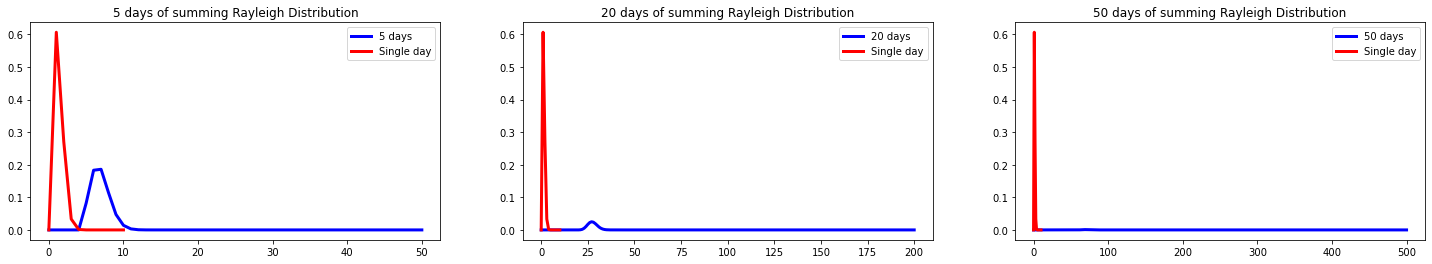

In [90]:
fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize = (25,4))
x = np.linspace(stats.rayleigh.ppf(.01), stats.rayleigh.ppf(.99), 100)
x = np.linspace(0, 10, 11)

err_data = stats.rayleigh.pdf(x, loc=0, scale=1)

days = 5
days_1 = 20
days_2 = 50

y1 = np.convolve(err_data, err_data)
for i in range(2, days):
    y1 = np.convolve(y1, err_data)
    
ax.set_title('5 days of summing Rayleigh Distribution')
x_new = np.linspace(0, 10*days, 10*days+1)
ax.plot(x_new, y1, 'b', lw=3, label = f'{days} days')
ax.plot(x, err_data, 'r', lw=3, label = 'Single day')
ax.legend()

y2 = np.convolve(err_data, err_data)
for i in range(2, days_1):
    y2 = np.convolve(y2, err_data)
    
ax1.set_title('20 days of summing Rayleigh Distribution')
x_new = np.linspace(0, 10*days_1, 10*days_1+1)
ax1.plot(x_new, y2, 'b', lw=3, label = f'{days_1} days')
ax1.plot(x, err_data, 'r', lw=3, label = 'Single day')
ax1.legend()

y3 = np.convolve(err_data, err_data)
for i in range(2, days_2):
    y3 = np.convolve(y3, err_data)
    
ax2.set_title('50 days of summing Rayleigh Distribution')
x_new = np.linspace(0, 10*days_2, 10*days_2+1)
ax2.plot(x_new, y3, 'b', lw=3, label = f'{days_2} days')
ax2.plot(x, err_data, 'r', lw=3, label = 'Single day')
ax2.legend()



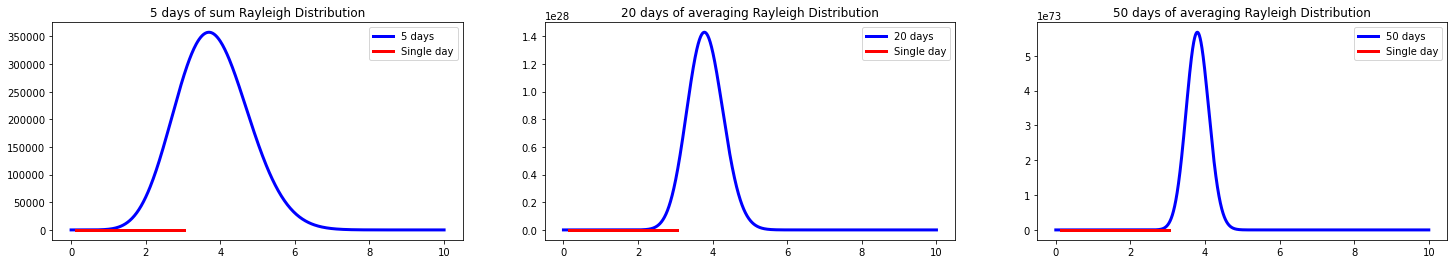

In [91]:
fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize = (25,4))
x = np.linspace(stats.rayleigh.ppf(.01), stats.rayleigh.ppf(.99), 100)
err_data = stats.rayleigh.pdf(x, loc=0, scale=1)

days = 5
days_1 = 20
days_2 = 50

y1 = np.convolve(err_data, err_data)
for i in range(2, days):
    y1 = np.convolve(y1, err_data)
    
ax.set_title('5 days of sum Rayleigh Distribution')
x_new = np.linspace(0, 10*days, 496)/days
ax.plot(x_new, y1, 'b', lw=3, label = f'{days} days')
ax.plot(x, err_data, 'r', lw=3, label = 'Single day')
ax.legend()

y2 = np.convolve(err_data, err_data)
for i in range(2, days_1):
    y2 = np.convolve(y2, err_data)
    
ax1.set_title('20 days of averaging Rayleigh Distribution')
x_new = np.linspace(0, 10*days_1, 1981)/days_1
ax1.plot(x_new, y2, 'b', lw=3, label = f'{days_1} days')
ax1.plot(x, err_data, 'r', lw=3, label = 'Single day')
ax1.legend()

y3 = np.convolve(err_data, err_data)
for i in range(2, days_2):
    y3 = np.convolve(y3, err_data)
    
ax2.set_title('50 days of averaging Rayleigh Distribution')
x_new = np.linspace(0, 10*days_2, 4951)/days_2
ax2.plot(x_new, y3, 'b', lw=3, label = f'{days_2} days')
ax2.plot(x, err_data, 'r', lw=3, label = 'Single day')
ax2.legend()
